## Data Representation in Scikit-Learn:

In [4]:
# Import Libraries:

import seaborn as sns
%matplotlib inline

In [2]:
# Import 'iris' dataset:

iris = sns.load_dataset('iris')

In [3]:
# Print the 'iris' dataset:

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Mitko\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


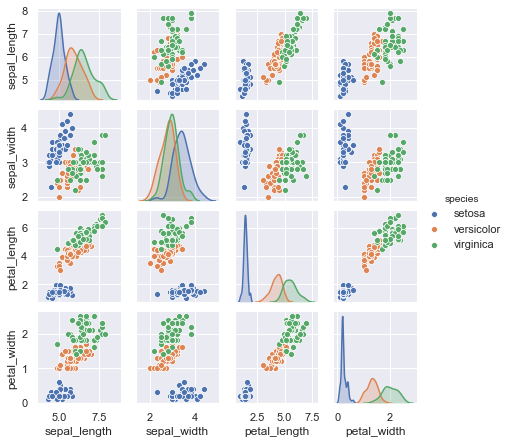

In [5]:
# Visualization of the 'iris' dataset:

sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)

In [10]:
# Exstracting the features matrix and target array from 'iris' DataFrame:

# Features martix:
X_iris = iris.drop('species', axis = 1)

# Target array:
y_iris = iris['species']

In [7]:
# Checking the shape of the X dataset (Features Matrix):

X_iris.shape

(150, 4)

In [11]:
# Checking the shape of the y dataset (Target Array):

y_iris.shape

(150,)

## Supervised Learning, example: Simple linear regression:

In [16]:
# Import Libraries:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

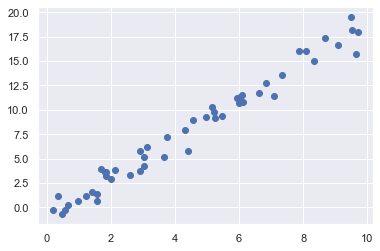

In [21]:
# Generating data for linear regression:

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x, y)

In [17]:
# Creating Linear Regression model object:

model = LinearRegression(fit_intercept = True)

In [18]:
# Checking the model parameters:

model

LinearRegression()

In [19]:
# Reshaping the x dataset in the appropriate form [n_samples, n_features]:

X = x[: ,np.newaxis]

In [22]:
# Checking the reshaped form of x dataset:

X.shape

(50, 1)

In [23]:
# Training the model:

model.fit(X, y)

LinearRegression()

In [25]:
# Checking the model learned parameters that were learned during the fit() process (all of them are with underscore_):

model.coef_, model.intercept_

(array([1.9776566]), -0.9033107255311164)

In [34]:
# Instanciating new X values for testing the model predictions:

xfit = np.linspace(-1, 11)
xfit.shape

(50,)

In [35]:
# Reshape the test values as preparation for model prediction:

Xfit = xfit[: ,np.newaxis]
Xfit.shape

(50, 1)

In [36]:
# Predictions with the model:

yfit = model.predict(Xfit)

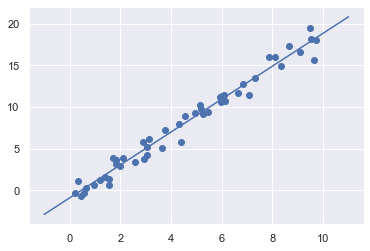

In [37]:
# Visualizing the predictions:

plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised Learning, example: Iris clasification:

In [46]:
# Import Libraries:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [41]:
# Splitting the 'iris' dataset into train and test segments:

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [43]:
# Creating GaussianNB model object:

model = GaussianNB()

In [44]:
# Training the model:

model.fit(Xtrain, ytrain)

GaussianNB()

In [45]:
# Predicting with the model:

y_model = model.predict(Xtest)

In [48]:
# Checking the accuracy of the model predictions:

accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised Learning, example: Iris dimensionality:

In [49]:
# Import Libararies:

from sklearn.decomposition import PCA

In [50]:
# Building PCA model object with hyperparameters:

model = PCA(n_components = 2)

In [51]:
# Training the model (it is fair to point that 'y' is not inserted here):

model.fit(X_iris)

PCA(n_components=2)

In [52]:
# Transform the data in two dimensions:

X_2D = model.transform(X_iris)

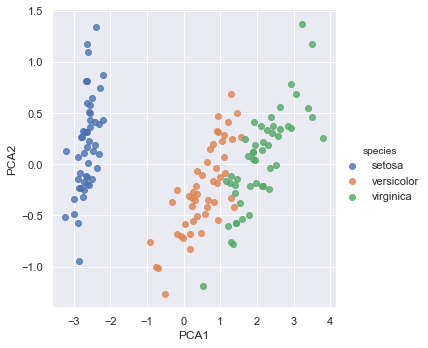

In [53]:
# Plotting the results. A quick way to do this is to insert the results into the original Iris DataFrame and use Seaborn's lmplot to show the results:

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

## Unsupervised Learning, example: Iris clustering:

In [55]:
# Import Libraries:

from sklearn.mixture import GaussianMixture

In [56]:
# Building GaussianMixture model object with hyperparameters:

model = GaussianMixture(n_components = 3, covariance_type = 'full')

In [57]:
# Training the model (it is fair to point that 'y' is not inserted here):

model.fit(X_iris)

GaussianMixture(n_components=3)

In [58]:
# Determining cluster labels:

y_gm = model.predict(X_iris)

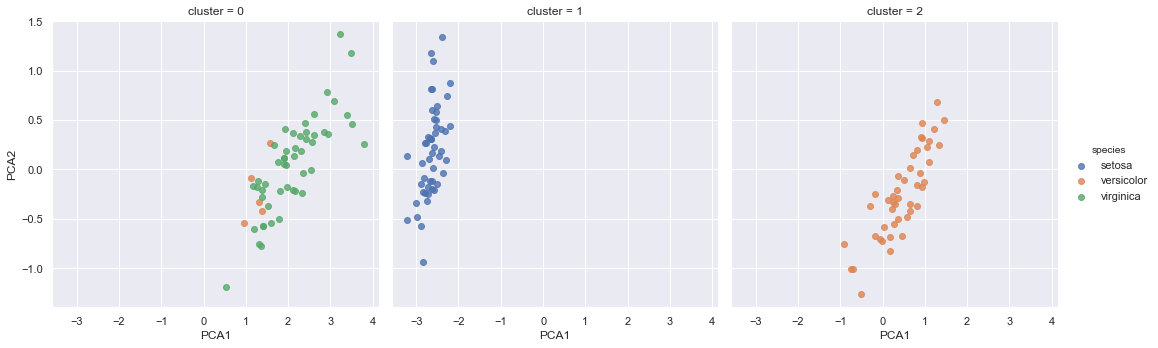

In [59]:
# Plotting the results. As before, we will add the cluster label to the Iris DataFrame and use Seaborn to plot the results:

iris['cluster'] = y_gm

sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)